In [2]:
# IMPORTACIÓN DE LAS BIBLIOTECAS QUE NECESITAMOS USAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Esto es necesario para realizar los ajustes lineales
from scipy.optimize import curve_fit
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# Esta función es necesaria para calcular el R^2
def rquared(y,y_fit):
    ss_res = np.sum((y - y_fit) ** 2) # Suma de los residuos al cuadrado
    ss_tot = np.sum((y - np.mean(y)) ** 2) # Suma Total de los cuadrados
    return 1 - (ss_res / ss_tot)     # R^2

In [5]:
# IMPORTACIÓN DE LOS DATOS DE EJEMPLO (Hojas)
directorio = 'datos_hojas/'
nombrearchivo='hojas_2015_MasaSup.csv'
data = pd.read_csv(directorio + nombrearchivo,header=None)
data

,0,1,2,3
0,0.38,0.01,20.500,5.000
1,0.60,0.01,19.500,4.000
2,1.31,0.01,51.000,8.750
3,0.62,0.01,29.000,6.000
4,1.32,0.01,48.250,7.750
5,0.72,0.01,37.125,9.375
6,0.76,0.01,25.000,6.000
7,0.25,0.01,9.625,3.375
8,0.39,0.01,16.875,4.375
9,0.26,0.01,17.875,5.125


In [6]:
# Los convierto por las dudas, en este caso no era necesario
M = np.asarray(data[0])
eM = np.asarray(data[1])
S = np.asarray(data[2])
eS = np.asarray(data[3])


In [7]:
# Considero los errores relativos para decidir quien va en el eje horiz y quien en el vertical.
# Dado que hay muchos tomo el promedio, pero se podrian usar otros criterios como el maximo, etc
print('error relativo promedio de M = ' + str(np.mean(eM/M))) 
print('error relativo promedio de S = ' + str(np.mean(eS/S)))

error relativo promedio de M = 0.030247783412
error relativo promedio de S = 0.219545298828


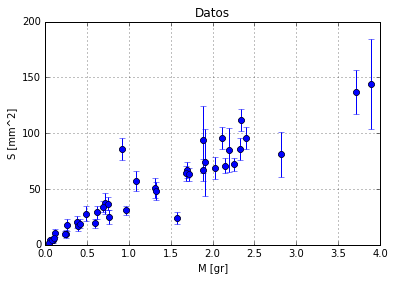

In [9]:
# GRAFICO
# grafica las barras de error:
plt.errorbar(M,S,xerr=eM,yerr=eS,color='b',fmt='o')#,10000,fmt='-o',color='g')
# grafica los puntos:
plt.plot(M,S,'ob')#,10000,fmt='-o',color='g')

# escribe los ejes y el título:
plt.xlabel('M [gr]')
plt.ylabel('S [mm^2]')
plt.title('Datos')
plt.grid('on')#para que muestre la grilla
plt.show()

In [14]:
# Ajustes lineal (Cuadrados minimos)
y = S
x = M

f = lambda x, B, M: M * x + B # la función modelo, con la que ajustamos

popt, pcov = curve_fit(f, x, y)#ajusto sin incertezas en y
sigmas = np.sqrt([pcov[0,0],pcov[1,1]])# las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
b=popt[0]
m=popt[1]
eb=sigmas[0]
em=sigmas[1]
print('Ordenada al origen: %f ± %f' % (b,eb))
print('Pendiente: %f ± %f'% (m,em))

Ordenada al origen: 5.701491 ± 3.228032
Pendiente: 35.104438 ± 2.005466


In [15]:
# Ajustes lineal con incertezas en y (Cuadrados minimos pesados)
y = S
yerr = eS
x = M
xerr = eM

popt, pcov = curve_fit(f, x, y, sigma = yerr,absolute_sigma=True)#ajusto con incertezas en y
                #sigma son las incertezas en y. absolute_sigma para que las considere absolutas.
sigmas = np.sqrt([pcov[0,0],pcov[1,1]])# las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
b=popt[0]
m=popt[1]
eb=sigmas[0]
em=sigmas[1]
print('Ordenada al origen: %f ± %f' % (b,eb))
print('Pendiente: %f ± %f'% (m,em))

Ordenada al origen: 1.789442 ± 0.576530
Pendiente: 34.974837 ± 1.044438


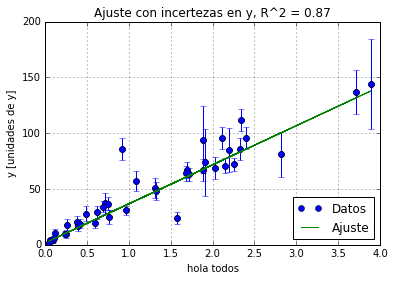

In [13]:
# graficamos
plt.errorbar(x,y,xerr=xerr,yerr=yerr,color='b',fmt='o')#,10000,fmt='-o',color='g')
plt.plot(x,y,'ob')#,10000,fmt='-o',color='g')
plt.xlabel('hola todos')
plt.ylabel('y [unidades de y]')
plt.title('Ajuste con incertezas en y, R^2 = %0.2f' % rquared(y,m*x+b))
plt.grid('on')#para que muestre la grilla

# Igual que antes, pero ahora además graficamos el ajuste
plt.plot(x,m*x+b,'g')#,10000,fmt='-o',color='g')
plt.legend(("Datos","Ajuste"), loc=4)

plt.show()